In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from os import walk
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Imports installations etc

In [63]:
# # !conda install -c pytorch pytorch-cpu torchvision
# # !yes Y | conda install -c pytorch pytorch-cpu torchvision
# from fastai.data.external import untar_data
# !conda install -c pytorch pytorch-cpu torchvision --y

In [64]:
# !conda install -c fastai fastaiorpip install http://download.pytorch.org/whl/cpu/torch-1.0.0-cp36-cp36m-linux_x86_64.whl --y

In [65]:
# !pip install fastai

In [66]:
# from fastai.vision import *

In [67]:
# !pip install ffmpeg

In [68]:
# import fastai # conda install -c pytorch -c fastai fastai=1.0.61

In [69]:
# conda install -c fastai fastbook
# from fastbook import *
# fastbook.setup_book()
import fastai
from fastai import *
from fastai.data.block import DataBlock
from fastai.data.external import *
from fastai.data.transforms import *
from fastai.vision import *
from fastai.vision.augment import RandomResizedCrop, Resize
from fastai.vision.data import ImageDataLoaders, ImageBlock



Convert videos to images, so we can actually work with them

In [70]:
import cv2
import matplotlib.pyplot as plt

In [71]:
# https://medium.com/howtoai/video-classification-with-cnn-rnn-and-pytorch-abe2f9ee031
# https://github.com/PacktPublishing/PyTorch-Computer-Vision-Cookbook/blob/master/Chapter10/myutils.py

def get_frames(filename, n_frames=1):
    print(filename)
    frames = []
    v_cap = cv2.VideoCapture(filename)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_list = np.linspace(0, v_len - 1, n_frames + 1, dtype=np.int16)

    for fn in range(v_len):
        success, frame = v_cap.read()
        if success is False:
            continue
        if fn in frame_list:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    v_cap.release()
    return frames, v_len


def store_frames(frames, path2store):
    for ii, frame in enumerate(frames):
        plt.imshow(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        # if not os.path.exists(path2store):
        #     os.makedirs(path2store)
        print(path2store)
        path2img = (path2store + "-frame-" + str(ii) + ".jpg").replace("\\", "/")
        # path2img = os.path.join(path2store, "-frame-" + str(ii) + ".jpg").replace("\\", "/")
        print(path2img)
        cv2.imwrite(path2img, frame)


temp_video_path = "D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/video/train/0-green-blue-9.avi"
temp_image_path = "D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/image/train/0-green-blue-9"
temp_frames, temp_frame_len = get_frames(temp_video_path, 5)
store_frames(temp_frames, temp_image_path)

D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/video/train/0-green-blue-9.avi


In [72]:
def extract_images_from_directory(video_directory, image_directory, f_num):
    _, _, filenames = next(walk(video_directory))
    for file in filenames:
        full_path = os.path.join(video_directory, file).replace("\\", "/")
        frames, len = get_frames(full_path, f_num)
        #cut out the file extension
        filename = file.split(".")[0]
        image_path = os.path.join(image_directory, filename).replace("\\", "/")
        store_frames(frames, image_path)


video_train_root = "D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/video/train/"
video_valid_root = "D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/video/valid/"
image_train_root = "D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/image/train/"
image_valid_root = "D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/image/valid/"
image_root = "D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/image"

frames_per_video = 5

# extract_images_from_directory(video_train_root, image_train_root, frames_per_video)
# extract_images_from_directory(video_valid_root, image_valid_root, frames_per_video)

# for file in valid_filenames:
#     full_path = os.path.join(video_valid_root, file).replace("\\", "/")
#     frames, len = get_frames(full_path, frames_per_video)
#     #cut out the file extension
#     filename = file.split(".")[0]
#     image_path = os.path.join(image_valid_root, filename).replace("\\", "/")
#     store_frames(frames, image_path)




In [73]:


# file_root = "../data/seizure_data/images/train/"
# train_image_root = "D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/image/train/"

# store_frames(test_frames, train_image_root)

# i = 0
# for frame in test_frames :
#     plt.imshow(frame)
#     # file_root = "../data/seizure_data/images/train/"
#     file_root = "D:/_PROJECTS/epilepsy-extension/src/data/seizure_data/images/train/"
#     file_name = "test-" + str(i)
#     file_extension = ".bmp"
#     filepath = file_root + file_name + file_extension
#     # filepath = "C:/Users/Alina Work/Desktop/temp.bmp"
#     cv2.imwrite(filepath, frame)
#     i += i

Build dataset from frames

In [74]:
# https://www.dataspoof.info/post/video-classification-with-fastai-and-deep-learning/
# np.random.seed(42)
dataset = ImageDataLoaders.from_folder(
    image_root,
    item_tfms=Resize(224)
)

    # train='train',
    # valid='valid',
# valid_pct=0.2,
# ds_tfms=get_transforms(),
# size=224,
# num_workers=4

# .normalize(imagenet_stats)

# dataset.show_batch()

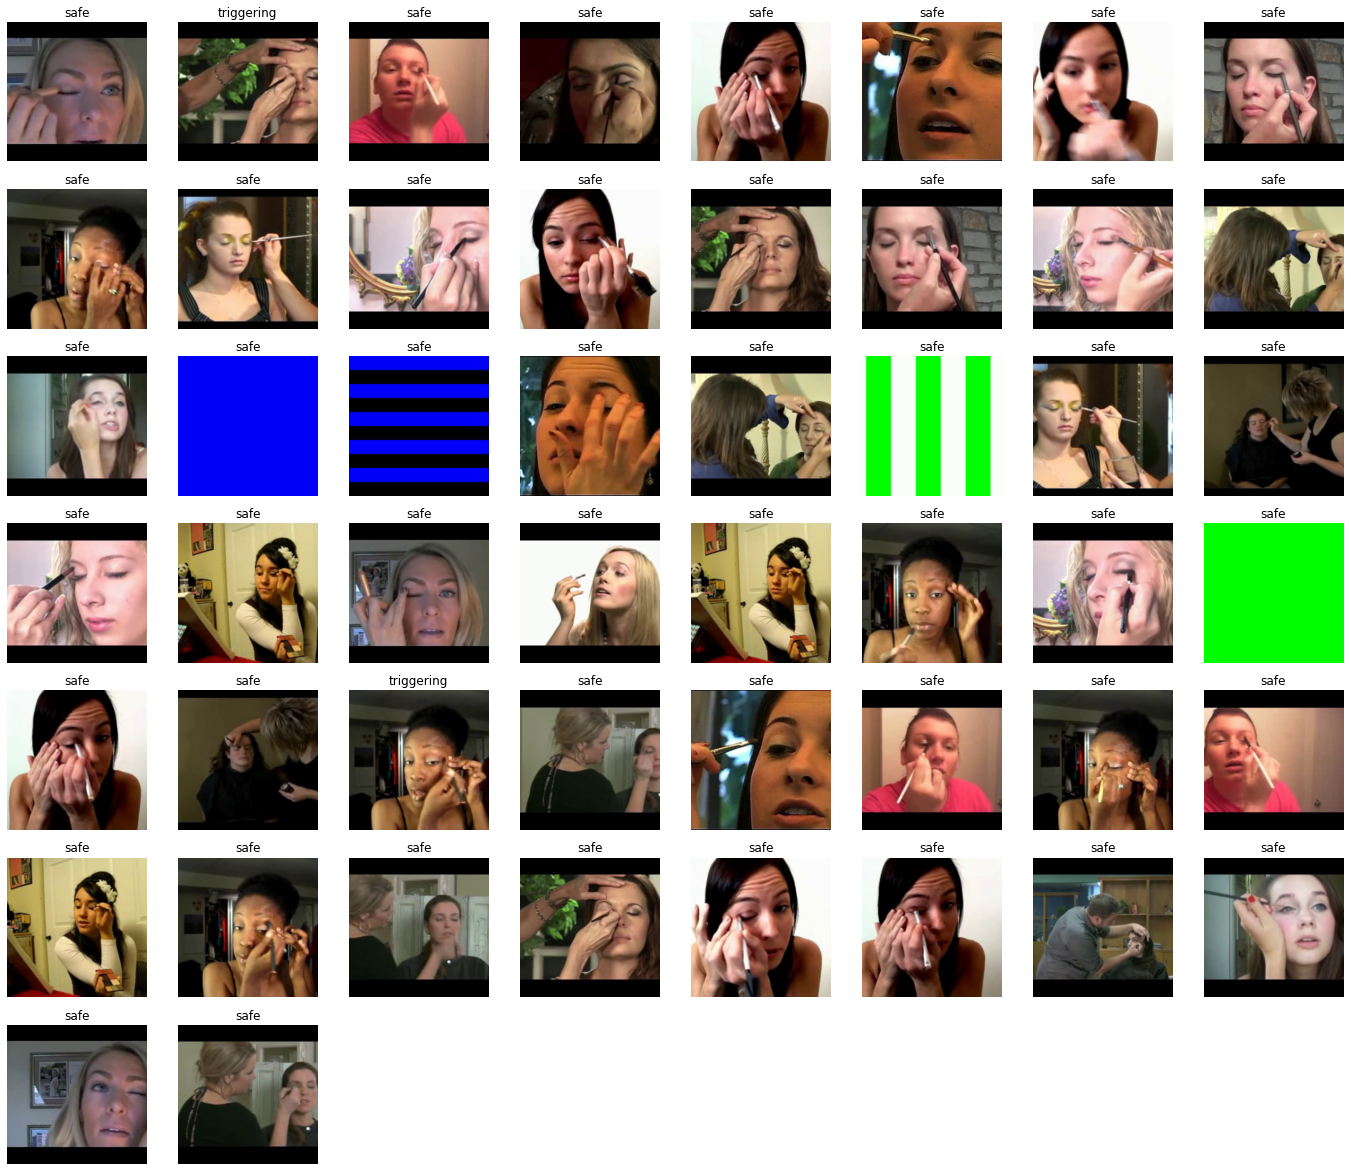

In [75]:
dataset.show_batch(max_n=50)
# data.classes

In [124]:
# dataset.train_ds.items[:]

dataset.vocab

['safe', 'triggering']

In [78]:
# path = untar_data(URLs.IMAGENETTE_160)
# path = "src/data/ucf-subset"

In [79]:
# dls = ImageDataLoaders.from_folder(
#     path,
#     valid='val',
#     item_tfms=RandomResizedCrop(128, min_scale=0.35),
#     # batch_tfms=Normalize.from_stats(*imagenet_stats)
# )

In [80]:
# dls.show_batch()

In [81]:
# fnames = get_image_files(path)

In [82]:
# dblock = DataBlock()

In [83]:
# dsets = dblock.datasets(fnames)
# dsets.train[0]

In [84]:
# dblock = DataBlock(get_items=get_image_files)

In [85]:
# dsets = dblock.datasets(path)
# dsets.train[0]

In [86]:
# parent_label(fnames[0])

In [87]:
# data = ImageDataLoaders.from_folder(
#     # path,
#     # train='../input/ucfsubset/ucf-subset/train',
#     # valid_pct=0.2,
#     # ds_tfms=get_transforms(),
#     # size=224,
#     # num_workers=4).normalize(imagenet_stats)

# data.classes

#Out: ['A', 'B', 'C']

In [88]:
# with open('readme.txt', 'w') as f:
#     f.write('Create a new text file!')

In [89]:
# # !pip install wget
# !wget https://www.fillmurray.com/g/200/300

In [90]:
# import wget

In [91]:
# fname = wget.download('https://www.fillmurray.com/g/200/300')

In [92]:
# open(fname)

In [93]:
# # from PIL import Image
# # from scipy.misc.pilutil import Image
# # import imagio
# import matplotlib.pyplot as plt
# img = plt.imread("300")
# plt.imshow(img)
# plt.show()

In [94]:
# img.shape


[Tutorial Link](https://www.analyticsvidhya.com/blog/2019/09/step-by-step-deep-learning-tutorial-video-classification-python/)

In [95]:
# !git clone https://github.com/AlinaWithAFace/epilepsy-extension

In [96]:
# import cv2     # for capturing videos
# import math   # for mathematical operations
# import matplotlib.pyplot as plt    # for plotting the images
# %matplotlib inline
# import pandas as pd
# from keras.preprocessing import image   # for preprocessing the images
# import numpy as np    # for mathematical operations
# from keras.utils import np_utils
# from skimage.transform import resize   # for resizing images
# from sklearn.model_selection import train_test_split
# from glob import glob
# from tqdm import tqdm
# !pip install opencv-python

In [97]:
# # open the .txt file which have names of training videos
# train_list_dir = "../input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/trainlist01.txt"
# # train_list_dir = "../data/ucfTrainTestlist/trainlist01.txt"
# f = open(train_list_dir, "r")
# temp = f.read()
# videos = temp.split('\n')

# # creating a dataframe having video names
# train = pd.DataFrame()
# train['video_name'] = videos
# train = train[:-1]
# train.head()

In [98]:
# !pip install moviepy

In [99]:
# import imageio
# vid = imageio.get_reader("../input/potential-photosensitive-epilepy-flashing-videos/src_generator_samples_1-blue-black-9.avi")

In [100]:
# # means = []
# for i,image in enumerate(vid.iter_data()):
#     np.save("PatSavesTheDay.npy", image)
#     break
#     #     means.append(image.mean())

In [101]:
# np.load("PatSavesTheDay.npy")

In [102]:
# (0,1) (0, 255)

In [103]:
# plt.plot(np.diff(means))

In [104]:
# plt.plot(np.diff(means))

In [105]:
# def rolling_window(a, window):
#     shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
#     strides = a.strides + (a.strides[-1],)
#     return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [106]:
# plt.plot(np.var(rolling_window(np.array(means), 29), axis =1))

In [107]:
# plt.plot(np.var(rolling_window(np.array(means), 30), axis =1))

In [108]:
# np.var(np.diff(means))

In [109]:
# import cv2
# import numpy as np

# cap = cv2.VideoCapture('../input/ucf101/UCF101/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi')
# frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

# fc = 0
# ret = True

# while (fc < frameCount  and ret):
#     ret, buf[fc] = cap.read()
#     fc += 1

# # cap.release()

# # cv2.namedWindow('frame 10')
# # cv2.imshow('frame 10', buf[9])


In [110]:
# cap.read()

In [111]:
# # open the .txt file which have names of test videos
# test_list_dir = "../input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/testlist01.txt"
# # test_list_dir = "../data/ucfTrainTestlist/testlist01.txt"
# f = open(test_list_dir, "r")
# temp = f.read()
# videos = temp.split('\n')

# # creating a dataframe having video names
# test = pd.DataFrame()
# test['video_name'] = videos
# test = test[:-1]
# test.head()

In [112]:
# # creating tags for training videos
# train_video_tag = []
# for i in range(train.shape[0]):
#     train_video_tag.append(train['video_name'][i].split('/')[0])

# train['tag'] = train_video_tag

# # creating tags for test videos
# test_video_tag = []
# for i in range(test.shape[0]):
#     test_video_tag.append(test['video_name'][i].split('/')[0])

# test['tag'] = test_video_tag

# # print(test['tag'])

In [113]:
# #from ipymol.compat import Image

# from PIL import Image

In [114]:
# import matplotlib.pyplot as plt
# # storing the frames from training videos
# # for i in tqdm(range(train.shape[0])):
# for i in tqdm(range(1)):
#     count = 0
#     videoFile = train['video_name'][i]
#     video_root = '../input/ucf101/UCF101/UCF-101/'
# #     video_root = "../data/UCF-101/"
#     video_tag = train_video_tag[i]
#     video_path = video_root + video_tag + "/"+ videoFile.split(' ')[0].split('/')[1]
# #    eg path ../input/ucf101/UCF101/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi
# #     print(video_path)
#     cap = cv2.VideoCapture(video_path)   # capturing the video from the given path
#     frameRate = cap.get(5) #frame rate
#     x=1
#     while(cap.isOpened()):
#         frameId = cap.get(1) #current frame number
#         ret, frame = cap.read()
#         if not ret:
#             break
#         plt.imshow(frame)
#         plt.show()
#         filename = "ucf-frames/train_1/image.jpg"
#         cv2.imwrite(filename, frame)
# #         if (frameId % math.floor(frameRate) == 0):
# #             # storing the frames in a new folder named train_1
# # #             filename = "train_1/" + videoFile.split('/')[1].split(' ')[0] +"_frame%d.jpg" % count
# # #             count+=1

# #             print(filename)
# #             cv2.imwrite(filename, frame)
#     cap.release()

In [115]:
# # getting the names of all the images
# images = glob("train_1/*.jpg")
# train_image = []
# train_class = []
# for i in tqdm(range(len(images))):
#     # creating the image name
#     train_image.append(images[i].split('/')[1])
#     # creating the class of image
#     train_class.append(images[i].split('/')[1].split('_')[1])

# # storing the images and their class in a dataframe
# train_data = pd.DataFrame()
# train_data['image'] = train_image
# train_data['class'] = train_class

# # converting the dataframe into csv file 
# train_data.to_csv('UCF/train_new.csv',header=True, index=False)

Training

In [116]:
# import keras
# from keras.models import Sequential
# from keras.applications.vgg16 import VGG16
# from keras.layers import Dense, InputLayer, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
# from keras.preprocessing import image
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# from sklearn.model_selection import train_test_split

In [117]:
# train = pd.read_csv('UCF/train_new.csv')
# train.head()

In [118]:
# # creating an empty list
# train_image = []

# # for loop to read and store frames
# for i in tqdm(range(train.shape[0])):
#     # loading the image and keeping the target size as (224,224,3)
#     img = image.load_img('train_1/'+train['image'][i], target_size=(224,224,3))
#     # converting it to array
#     img = image.img_to_array(img)
#     # normalizing the pixel value
#     img = img/255
#     # appending the image to the train_image list
#     train_image.append(img)

# # converting the list to numpy array
# X = np.array(train_image)

# # shape of the array
# X.shape

In [119]:
# # separating the target
# y = train['class']

# # creating the training and validation set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)